# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Load the dataset

In [2]:
prabinAnuj = pd.read_csv("student_data.csv")
prabinAnuj.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
# data shape
prabinAnuj.shape

(395, 33)

In [4]:
# data length
len(prabinAnuj)

395

In [5]:
# data types
prabinAnuj.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [6]:
# data description
prabinAnuj.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [7]:
# data information
prabinAnuj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

# Checking Missing Values

In [8]:
# Checking missing values
print("\nMissing Values:")
print(prabinAnuj.isnull().sum())


Missing Values:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


# Checking and Handling Zero Values in all (both numeric and non-numeric) columns

In [9]:
# Display zero values before cleaning for all columns
print("\nZero values in all columns before cleaning:")
zero_values_before_all = (prabinAnuj == 0).sum()
print(zero_values_before_all)


Zero values in all columns before cleaning:
school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            3
Fedu            2
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures      312
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences      115
G1              0
G2             13
G3             38
dtype: int64


In [10]:
#Numeric columns with zeros
numeric_columns_with_zeros = ['Medu', 'Fedu', 'failures', 'absences', 'G2', 'G3']

# Replace zero values with mean in numeric columns
for column in numeric_columns_with_zeros:
    if (prabinAnuj[column] == 0).any():
        mean_value = prabinAnuj[column].mean()
        prabinAnuj[column] = prabinAnuj[column].replace(0, mean_value)

# Display zero values after cleaning 
print("\nZero values in all columns after cleaning:")
zero_values_after_all = (prabinAnuj == 0).sum()
print(zero_values_after_all)


Zero values in all columns after cleaning:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


# Checking duplicate values per columns

In [11]:
# Check for duplicate rows
duplicate_rows = prabinAnuj.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


In [12]:
# List of numerical columns
numerical_columns = ["age", "Medu", "Fedu", "traveltime", "studytime", "failures", 
                     "famrel", "freetime", "goout", "Dalc", "Walc", "health", 
                     "absences", "G1", "G2", "G3"]

# Filter the DataFrame to include only numerical columns
numerical_df = prabinAnuj[numerical_columns]

# Function to detect outliers using the IQR method
def detect_outliers(df):
    outliers = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_condition = ((df[column] < lower_bound) | (df[column] > upper_bound))
        outliers[column] = df[column][outlier_condition]
    return outliers

# Detect and print outliers before removal
print("\nOutliers before removal:")
outliers_before = detect_outliers(numerical_df)
for column, outliers in outliers_before.items():
    print(f"{column}: {outliers.index.tolist()}")


Outliers before removal:
age: [247]
Medu: []
Fedu: []
traveltime: [61, 108, 134, 149, 164, 228, 327, 375]
studytime: [47, 66, 67, 69, 70, 71, 76, 77, 94, 95, 105, 106, 108, 121, 140, 204, 210, 256, 259, 271, 282, 293, 298, 303, 330, 334, 338]
failures: [2, 18, 25, 40, 44, 49, 52, 72, 78, 85, 88, 95, 111, 112, 118, 127, 128, 130, 137, 138, 141, 144, 146, 149, 150, 151, 152, 153, 157, 159, 160, 161, 162, 164, 165, 170, 173, 198, 205, 206, 213, 216, 217, 221, 225, 239, 247, 248, 250, 252, 255, 270, 278, 281, 292, 304, 305, 307, 308, 309, 310, 312, 313, 314, 315, 336, 340, 341, 343, 349, 350, 352, 353, 361, 367, 370, 376, 383, 384, 387, 389, 390, 392]
famrel: [25, 27, 37, 46, 60, 66, 79, 108, 140, 141, 150, 156, 184, 206, 207, 222, 238, 240, 278, 296, 299, 349, 357, 363, 389, 391]
freetime: [7, 19, 68, 89, 95, 106, 111, 112, 168, 189, 238, 260, 276, 293, 301, 314, 315, 378, 389]
goout: []
Dalc: [29, 54, 61, 66, 100, 159, 175, 192, 211, 223, 228, 236, 247, 327, 349, 369, 384, 390]
Walc: []

In [13]:
# Function to remove outliers using the IQR method
def remove_outliers(df):
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers
numerical_df_cleaned = remove_outliers(numerical_df)

# Detect and print outliers after removal
print("\nOutliers after removal:")
outliers_after = detect_outliers(numerical_df_cleaned)
for column, outliers in outliers_after.items():
    print(f"{column}: {outliers.index.tolist()}")




Outliers after removal:
age: []
Medu: []
Fedu: []
traveltime: []
studytime: []
failures: []
famrel: []
freetime: []
goout: []
Dalc: [23, 30, 41, 48, 50, 53, 63, 64, 73, 75, 84, 92, 125, 129, 136, 143, 148, 166, 182, 193, 197, 233, 241, 249, 254, 266, 267, 273, 275, 318, 319, 322, 323, 324, 325, 326, 337, 339, 345, 347, 351, 365, 366, 371, 377, 386, 393, 394]
Walc: []
health: []
absences: []
G1: []
G2: []
G3: []


In [14]:
# Updating the original dataframe by removing rows with outliers
prabinAnuj_cleaned = prabinAnuj.drop(index=numerical_df.index.difference(numerical_df_cleaned.index))

# Show the shape of the cleaned dataframe
print("\nShape of dataframe before outlier removal:", prabinAnuj.shape)
print("Shape of dataframe after outlier removal:", prabinAnuj_cleaned.shape)


Shape of dataframe before outlier removal: (395, 33)
Shape of dataframe after outlier removal: (209, 33)


Encoding Categorical Values

In [15]:
#Identifying categorical columns
categorical_columns = prabinAnuj.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_columns)

Categorical Columns: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [16]:
# Encoding the categorical values
label_encoders = {}
for column in categorical_columns:
    if column != 'G3':  
        le = LabelEncoder()
        prabinAnuj[column] = le.fit_transform(prabinAnuj[column])
        label_encoders[column] = le

# Encoding the target variable separately
target_encoder = LabelEncoder()
prabinAnuj['G3'] = target_encoder.fit_transform(prabinAnuj['G3'])

prabinAnuj.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4.0,4.0,0,4,...,4,3,4,1,1,3,6.0,5,6.0,2
1,0,0,17,1,0,1,1.0,1.0,0,2,...,5,3,3,1,1,3,4.0,5,5.0,2
2,0,0,15,1,1,1,1.0,1.0,0,2,...,4,3,2,2,3,3,10.0,7,8.0,6
3,0,0,15,1,0,1,4.0,2.0,1,3,...,3,2,2,1,1,5,2.0,15,14.0,12
4,0,0,16,1,0,1,3.0,3.0,2,2,...,4,3,2,1,2,5,4.0,6,10.0,6


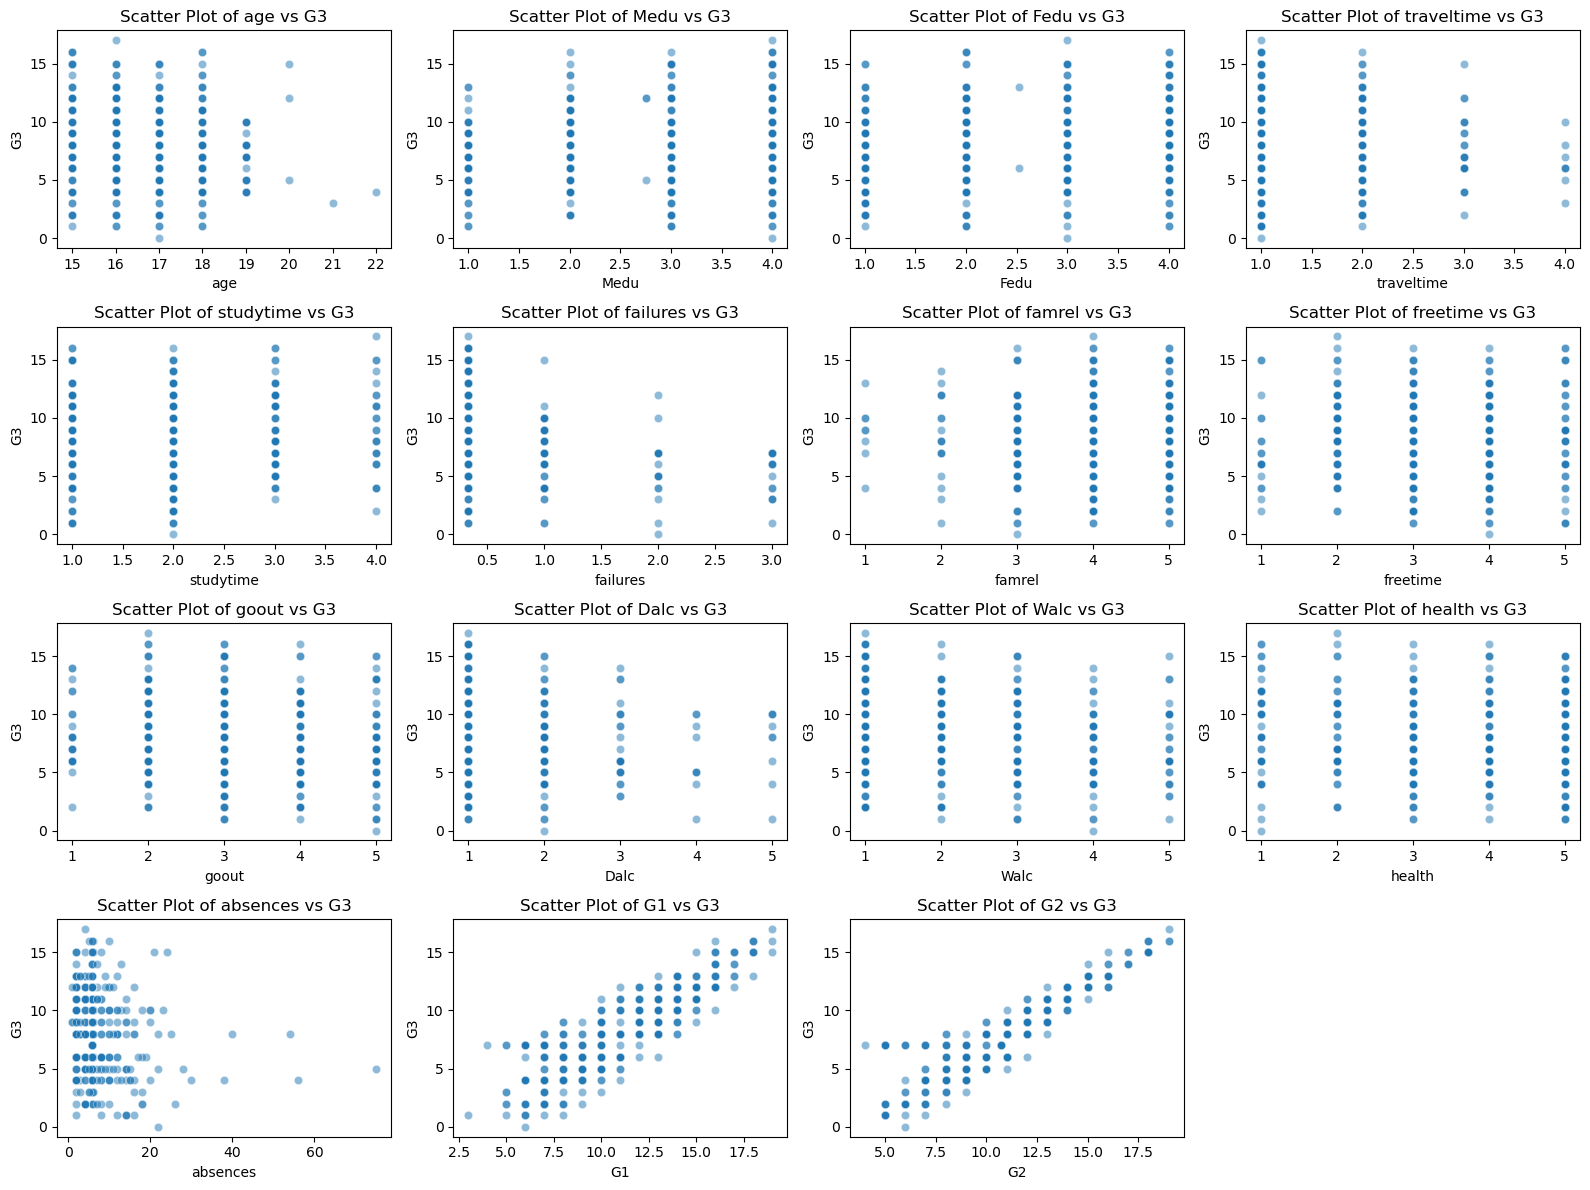

In [17]:
# Numeric columns
numeric_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
                   'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

# Scatter plot between numeric columns and G3
plt.figure(figsize=(16, 12))
for i, column in enumerate(numeric_columns[:-1]):  # Exclude 'G3' from scatter plot
    plt.subplot(4, 4, i + 1)
    sns.scatterplot(data=prabinAnuj, x=column, y='G3', alpha=0.5)
    plt.title(f'Scatter Plot of {column} vs G3')

plt.tight_layout()
plt.show()

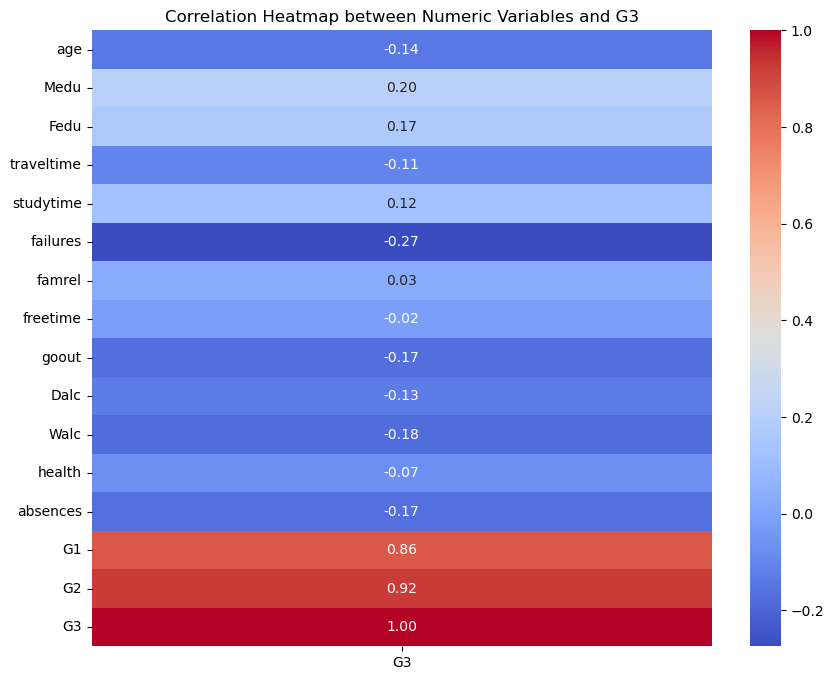

In [18]:
# Heatmap of correlations between numeric columns and G3
plt.figure(figsize=(10, 8))
correlation_matrix = prabinAnuj[numeric_columns].corr()
sns.heatmap(correlation_matrix[['G3']], annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap between Numeric Variables and G3')
plt.show()


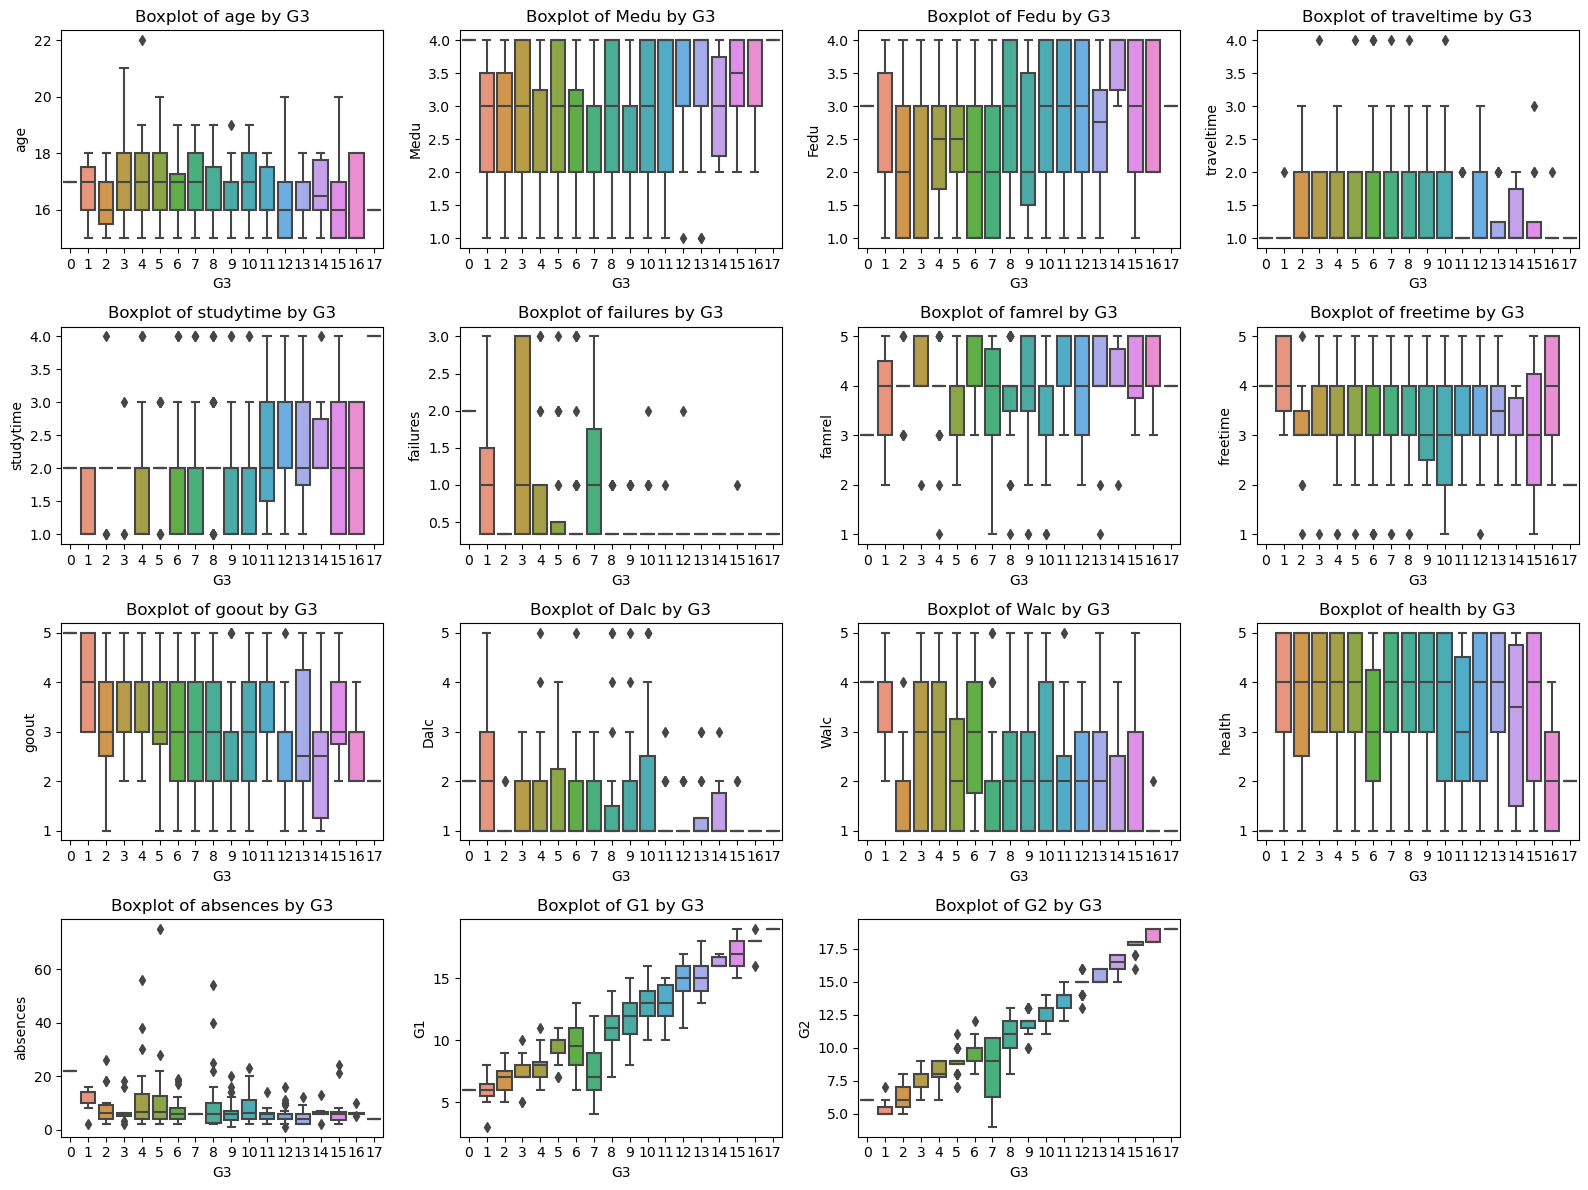

In [19]:
# Boxplot between numeric columns and G3
plt.figure(figsize=(16, 12))
for i, column in enumerate(numeric_columns[:-1]):  # Exclude 'G3' from boxplot
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=prabinAnuj, x='G3', y=column)
    plt.title(f'Boxplot of {column} by G3')

plt.tight_layout()
plt.show()

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

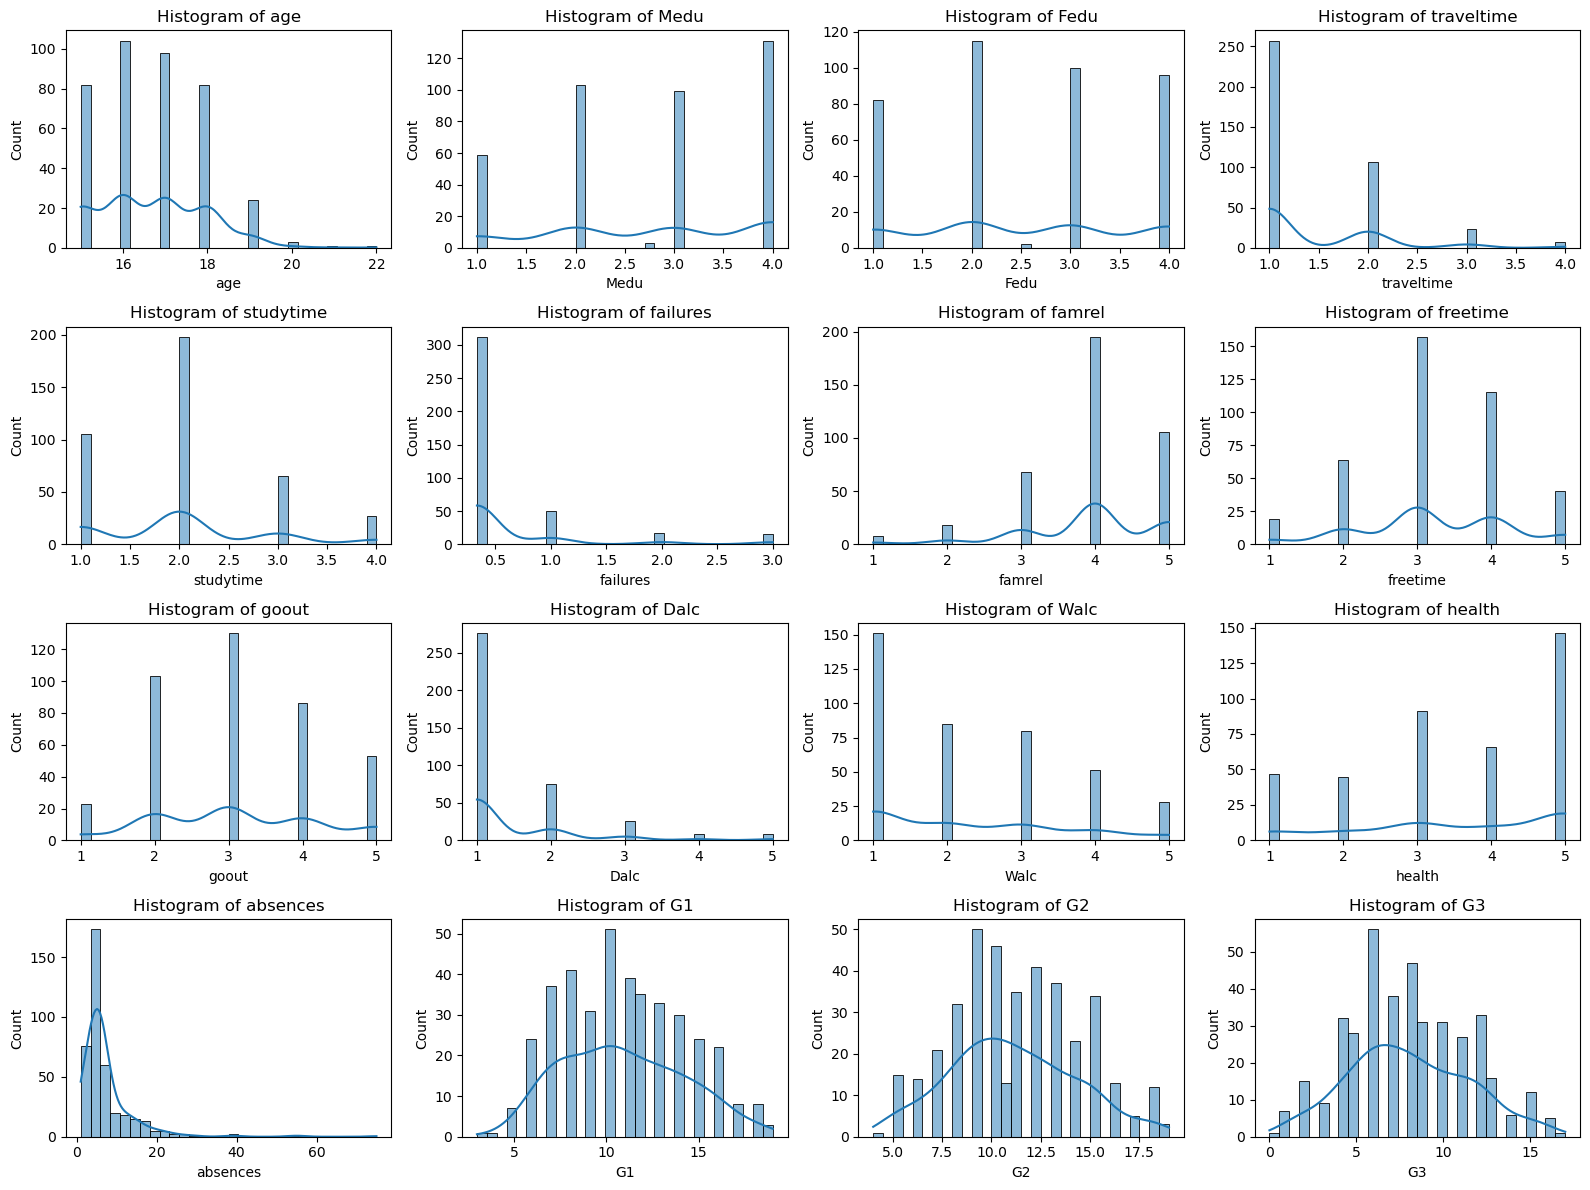

In [20]:
# Histograms for numeric columns
plt.figure(figsize=(16, 12))
for i, column in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(data=prabinAnuj, x=column, kde=True, bins=30)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()